# **Quantum Computer Simulation**

## Cirq and Qsim Installer

In [26]:
import datetime
try:
    import cirq
    import qsimcirq
except ImportError:
    print("Installing cirq and Qsim (qsimcirq). This might take a moment...")
    !pip install --quiet cirq qsimcirq
    import cirq
    import qsimcirq
    print("Installed cirq and Qsim (qsimcirq).")

## Superposition Simulation and Measurement

Quantum Circuit:
(0, 0): ───H───M('result')───

Measurement results after 1000 repetitions:
Counter({1: 510, 0: 490})

Vector status (before measurement):
[0.70710677+0.j 0.70710677+0.j]

Vector status (after measurement):
[1.+0.j 0.+0.j]


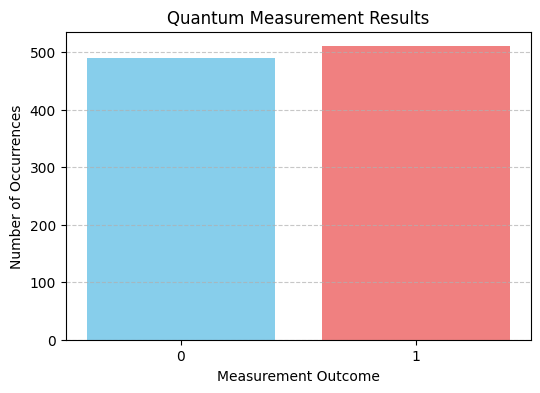

Counter({1: 510, 0: 490})


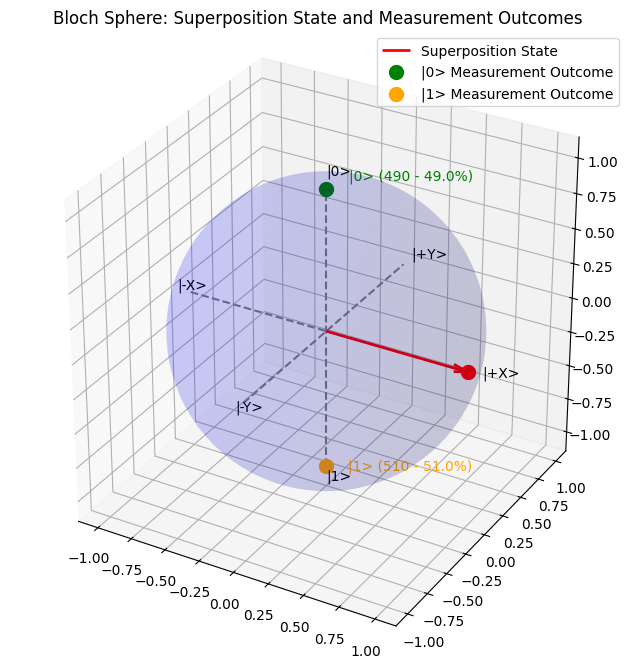

In [66]:
import cirq
import qsimcirq
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def run_superposition_simulation():
    # 1. Specify one qubit. GridQubit is commonly used in Cirq.
    q = cirq.GridQubit(0, 0)

    # 2. Create a circuit.
    # Circuit after measurement (circuit_a)
    circuit_a = cirq.Circuit(
        # Apply the Hadamard gate (H) to put the qubit in superposition
        cirq.H(q),
        # Measure the qubit to observe the result (this collapses the superposition)
        cirq.measure(q, key='result'))

    # Circuit before measurement (circuit_b)
    circuit_b = cirq.Circuit(
        # Apply the Hadamard gate (H) to put the qubit in superposition
        cirq.H(q))

    # Print the circuit (optional)
    print("Quantum Circuit:")
    print(circuit_a)

    # 3. Run the circuit on the simulator.
    # We run it multiple times (e.g., 100 times) to see the probability distribution.
    simulator = qsimcirq.QSimSimulator()
    result = simulator.run(circuit_a, repetitions=1000)

    # 4. Print the measurement results.
    print("\nMeasurement results after 1000 repetitions:")
    counts = result.histogram(key='result')
    print(counts)

    # You can also use cirq.sample_state_vector to view the state vector directly
    # without measurement, which shows the complex superposition coefficients:
    print("\nVector status (before measurement):")
    initial_state = simulator.simulate(circuit_b).final_state_vector
    print(initial_state)

    # Vector after measurement
    print("\nVector status (after measurement):")
    after_m = simulator.simulate(circuit_a).final_state_vector
    print(after_m)

    # Plotting measurement results
    # Convert Counter to lists for plotting
    measurement_outcomes = list(counts.keys())
    probabilities = list(counts.values())

    # Create the bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(measurement_outcomes, probabilities, color=['skyblue', 'lightcoral'])

    # Add labels and title
    plt.xlabel('Measurement Outcome')
    plt.ylabel('Number of Occurrences')
    plt.title('Quantum Measurement Results')
    plt.xticks(measurement_outcomes) # Ensure ticks are at 0 and 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    print(counts)

    # Bloch Sphere Visualization
    alph = initial_state[0]
    beta = initial_state[1]

    # Calculate Bloch coordinates for the superposition state
    x_superposition = 2 * np.real(alph * np.conjugate(beta))
    y_superposition = 2 * np.imag(alph * np.conjugate(beta))
    z_superposition = np.abs(alph)**2 - np.abs(beta)**2

    # Create a new figure for the Bloch sphere
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    xs = np.outer(np.cos(u), np.sin(v))
    ys = np.outer(np.sin(u), np.sin(v))
    zs = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(xs, ys, zs, color='b', alpha=0.1, linewidth=0)

    # Plot the axes
    ax.plot([-1, 1], [0, 0], [0, 0], color='gray', linestyle='--') # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], color='gray', linestyle='--') # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], color='gray', linestyle='--') # Z-axis

    # Labels for axes
    ax.text(1.1, 0, 0, '|+X>', color='black')
    ax.text(-1.1, 0, 0, '|-X>', color='black')
    ax.text(0, 1.1, 0, '|+Y>', color='black')
    ax.text(0, -1.1, 0, '|-Y>', color='black')
    ax.text(0, 0, 1.1, '|0>', color='black')
    ax.text(0, 0, -1.1, '|1>', color='black')

    # Plot the qubit superposition state vector
    ax.quiver(0, 0, 0, x_superposition, y_superposition, z_superposition, color='r', linewidth=2, arrow_length_ratio=0.1, label='Superposition State')
    ax.scatter(x_superposition, y_superposition, z_superposition, color='r', s=100) # Plot the point on the sphere

    # --- Add dynamic visualization of measurement results ---
    count_0 = counts.get(0, 0)
    count_1 = counts.get(1, 0)
    total_repetitions = sum(counts.values())

    if total_repetitions > 0:
        percent_0 = (count_0 / total_repetitions) * 100
        percent_1 = (count_1 / total_repetitions) * 100
    else:
        percent_0 = 0
        percent_1 = 0

    # Plot the |0> state pole (North pole) as a marker
    ax.scatter(0, 0, 1, color='g', s=100, marker='o', label='|0> Measurement Outcome')
    ax.text(0.1, 0.1, 1.05, f'|0> ({count_0} - {percent_0:.1f}%)', color='g', fontsize=10)

    # Plot the |1> state pole (South pole) as a marker
    ax.scatter(0, 0, -1, color='orange', s=100, marker='o', label='|1> Measurement Outcome')
    ax.text(0.1, 0.1, -1.05, f'|1> ({count_1} - {percent_1:.1f}%)', color='orange', fontsize=10)

    ax.set_title('Bloch Sphere: Superposition State and Measurement Outcomes')
    ax.set_box_aspect([1,1,1]) # Equal aspect ratio
    ax.legend()

    plt.show()

if __name__ == '__main__':
    run_superposition_simulation()


## Bell State Circuit


Bell State Circuit:
(0, 0): ───H───@───M('final_result')───
               │   │
(0, 1): ───────X───M───────────────────

Measurement results after 1000 repetitions:
Counter({3: 529, 0: 471})

Vector status (before measurement):
[0.70710677+0.j 0.        +0.j 0.        +0.j 0.70710677+0.j]

Vector status (after measurement):
[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


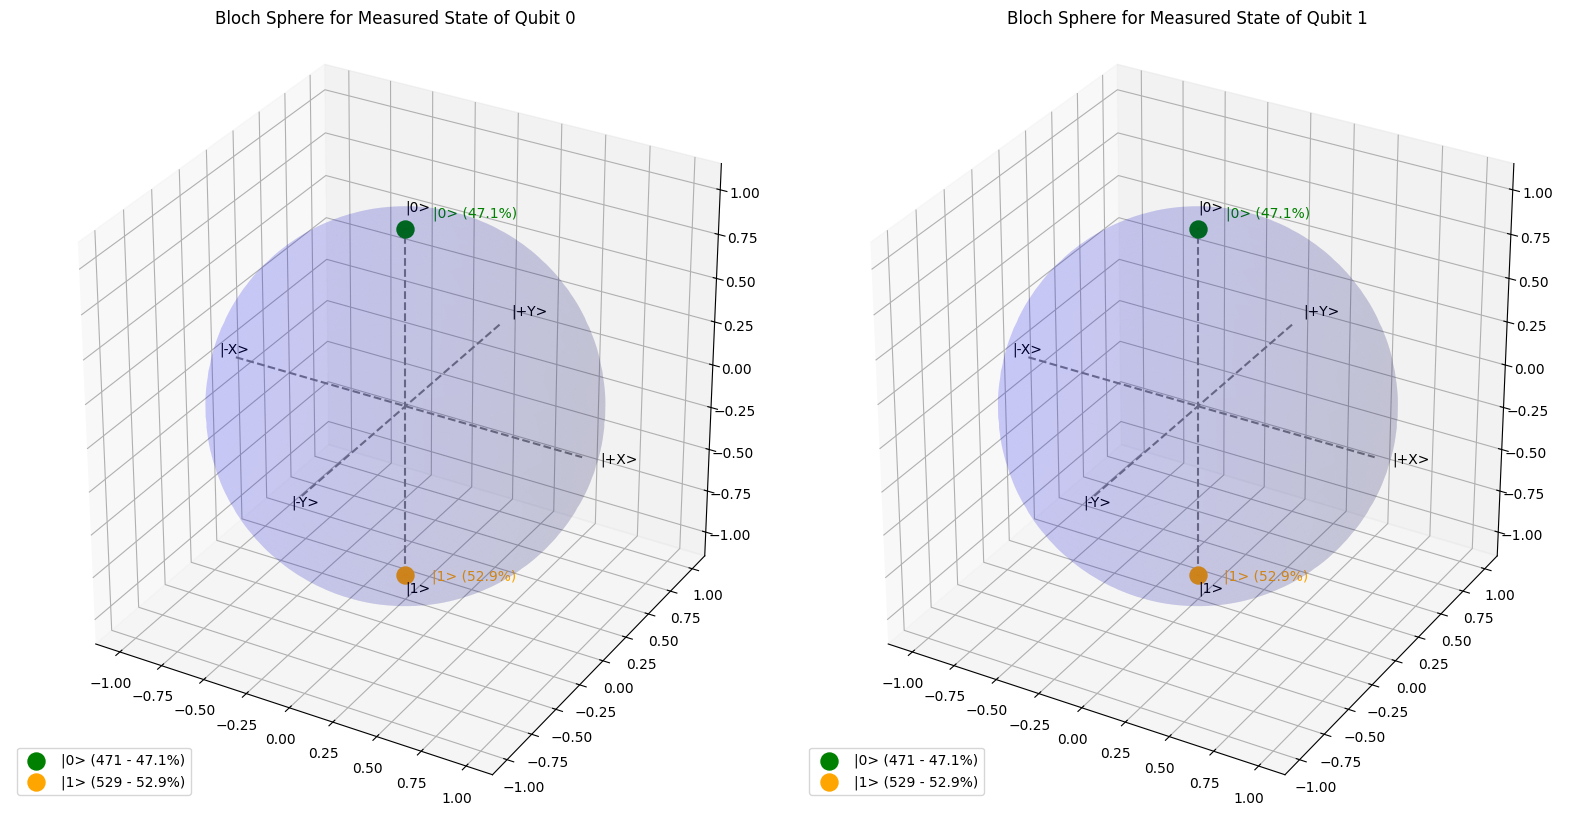

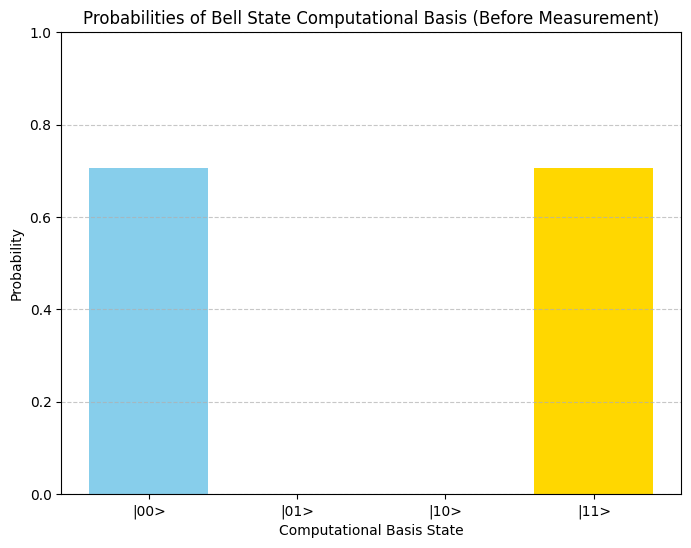

In [65]:
import cirq
import qsimcirq
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_bloch_sphere_measured_state(ax, qubit_name, counts_0, counts_1, total_repetitions):
    """Plots a Bloch sphere for a single qubit with measured state outcomes."""

    # Draw the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    xs = np.outer(np.cos(u), np.sin(v))
    ys = np.outer(np.sin(u), np.sin(v))
    zs = np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(xs, ys, zs, color='b', alpha=0.1, linewidth=0)

    # Plot the axes
    ax.plot([-1, 1], [0, 0], [0, 0], color='gray', linestyle='--') # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], color='gray', linestyle='--') # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], color='gray', linestyle='--') # Z-axis

    # Labels for axes
    ax.text(1.1, 0, 0, '|+X>', color='black')
    ax.text(-1.1, 0, 0, '|-X>', color='black')
    ax.text(0, 1.1, 0, '|+Y>', color='black')
    ax.text(0, -1.1, 0, '|-Y>', color='black')
    ax.text(0, 0, 1.1, '|0>', color='black')
    ax.text(0, 0, -1.1, '|1>', color='black')

    if total_repetitions > 0:
        percent_0 = (counts_0 / total_repetitions) * 100
        percent_1 = (counts_1 / total_repetitions) * 100
    else:
        percent_0 = 0
        percent_1 = 0

    # Plot the |0> state pole (North pole) as a marker
    ax.scatter(0, 0, 1, color='g', s=150, marker='o', label=f'|0> ({counts_0} - {percent_0:.1f}%)')
    ax.text(0.1, 0.1, 1.05, f'|0> ({percent_0:.1f}%)', color='g', fontsize=10)

    # Plot the |1> state pole (South pole) as a marker
    ax.scatter(0, 0, -1, color='orange', s=150, marker='o', label=f'|1> ({counts_1} - {percent_1:.1f}%)')
    ax.text(0.1, 0.1, -1.05, f'|1> ({percent_1:.1f}%)', color='orange', fontsize=10)

    ax.set_title(f'Bloch Sphere for Measured State of {qubit_name}')
    ax.set_box_aspect([1,1,1]) # Equal aspect ratio
    ax.legend(loc='lower left')

def run_bell_state_circuit():
    # 1. Define two qubits
    q0 = cirq.GridQubit(0, 0)
    q1 = cirq.GridQubit(0, 1)

    # 2. Create an empty cirq.Circuit object
    circuit_a = cirq.Circuit(
        # Apply a Hadamard gate (cirq.H) to the first qubit (q0)
        cirq.H(q0),
        # Apply a CNOT gate (cirq.CNOT) with q0 as the control and q1 as the target
        cirq.CNOT(q0, q1),
        # Add measurement operations to both qubits
        cirq.measure(q0, q1, key='final_result')
    )

    circuit_b = cirq.Circuit(
        # Apply a Hadamard gate (cirq.H) to the first qubit (q0)
        cirq.H(q0),
        # Apply a CNOT gate (cirq.CNOT) with q0 as the control and q1 as the target
        cirq.CNOT(q0, q1)
    )


    # 3. Print the created circuit to visualize its structure
    print("Bell State Circuit:")
    print(circuit_a)

    # 4. Run the circuit on the simulator.
    # We run it multiple times (e.g., 100 times) to see the probability distribution.
    simulator = qsimcirq.QSimSimulator()
    result = simulator.run(circuit_a, repetitions=1000)

    # 4. Print the measurement results.
    print("\nMeasurement results after 1000 repetitions:")
    counts = result.histogram(key='final_result')
    print(counts)

    # You can also use cirq.sample_state_vector to view the state vector directly
    # without measurement, which shows the complex superposition coefficients:
    print("\nVector status (before measurement):")
    initial_state = simulator.simulate(circuit_b).final_state_vector
    print(initial_state)

    # Vector after measurement
    print("\nVector status (after measurement):")
    after_m = simulator.simulate(circuit_a).final_state_vector
    print(after_m)

    # Retrieve counts from the Bell state simulation
    # The 'counts' variable stores measurement results as integers where 0='00', 1='01', 2='10', 3='11'

    # Initialize counts for each qubit
    q0_counts_0 = 0
    q0_counts_1 = 0
    q1_counts_0 = 0
    q1_counts_1 = 0

    total_repetitions = sum(counts.values())

    for outcome, num_occurrences in counts.items():
        # outcome is an integer, convert to binary string to check individual qubit states
        # For 2 qubits, outcome 0 is '00', 1 is '01', 2 is '10', 3 is '11'
        binary_outcome = format(outcome, '02b') # '02b' ensures 2-bit binary representation

        if binary_outcome[0] == '0': # First qubit (q0) is 0
            q0_counts_0 += num_occurrences
        else: # First qubit (q0) is 1
            q0_counts_1 += num_occurrences

        if binary_outcome[1] == '0': # Second qubit (q1) is 0
            q1_counts_0 += num_occurrences
        else: # Second qubit (q1) is 1
            q1_counts_1 += num_occurrences

    # Create a figure with two subplots
    fig = plt.figure(figsize=(16, 8))

    # Plot for Qubit 0
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    plot_bloch_sphere_measured_state(ax0, 'Qubit 0', q0_counts_0, q0_counts_1, total_repetitions)

    # Plot for Qubit 1
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    plot_bloch_sphere_measured_state(ax1, 'Qubit 1', q1_counts_0, q1_counts_1, total_repetitions)

    plt.tight_layout()
    plt.show()

    # The final_state_vector is available from the simulation for circuit_b
    # (before measurement)
    # initial_state = simulator.simulate(circuit_b).final_state_vector

    # Calculate probabilities from the amplitudes (square of the absolute values)
    probabilities = np.abs(initial_state)

    # Define labels for the computational basis states
    # For two qubits, the states are |00>, |01>, |10>, |11>
    state_labels = ['|00>', '|01>', '|10>', '|11>']

    # Create the bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(state_labels, probabilities, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

    # Add labels and title
    plt.xlabel('Computational Basis State')
    plt.ylabel('Probability')
    plt.title('Probabilities of Bell State Computational Basis (Before Measurement)')
    plt.ylim(0, 1) # Probabilities range from 0 to 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

if __name__ == '__main__':
    run_bell_state_circuit()


## Deutsch-Josza Circuit

### Constant Function Oracle

Circuit for Constant Function:
(0, 0): ───H───H───M('result')───

(0, 1): ───X───H─────────────────

Simulation results (for q0):
Counter({0: 100})

Vector status (before measurement):
[ 0.70710677+0.j -0.70710677+0.j  0.        +0.j  0.        +0.j]

Vector status (after measurement):
[ 0.70710677+0.j -0.70710677+0.j  0.        +0.j  0.        +0.j]


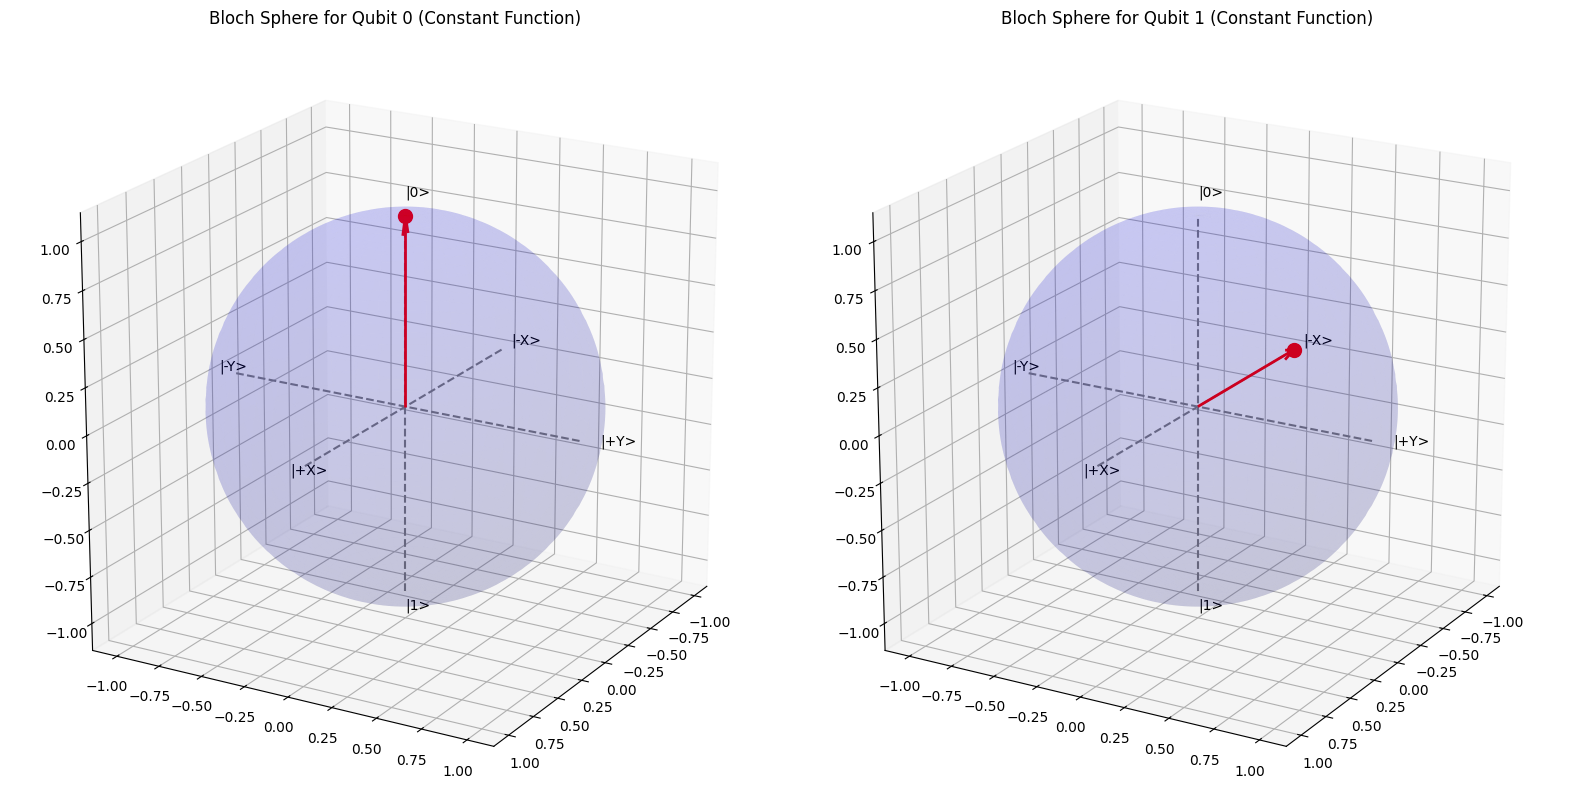

Bloch vector for q0 (constant function): (0.000, 0.000, 1.000)
Bloch vector for q1 (constant function): (-1.000, 0.000, 0.000)


In [63]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import qsimcirq

def plot_bloch_sphere(ax, x, y, z, title):
    """Plots a Bloch sphere with a given state vector."""
    # Draw the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    xs = np.outer(np.cos(u), np.sin(v))
    ys = np.outer(np.sin(u), np.sin(v))
    zs = np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(xs, ys, zs, color='b', alpha=0.1, linewidth=0)

    # Plot the axes
    ax.plot([-1, 1], [0, 0], [0, 0], color='gray', linestyle='--') # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], color='gray', linestyle='--') # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], color='gray', linestyle='--') # Z-axis

    # Labels for axes
    ax.text(1.1, 0, 0, '|+X>', color='black')
    ax.text(-1.1, 0, 0, '|-X>', color='black')
    ax.text(0, 1.1, 0, '|+Y>', color='black')
    ax.text(0, -1.1, 0, '|-Y>', color='black')
    ax.text(0, 0, 1.1, '|0>', color='black')
    ax.text(0, 0, -1.1, '|1>', color='black')

    # Plot the qubit state vector
    ax.quiver(0, 0, 0, x, y, z, color='r', linewidth=2, arrow_length_ratio=0.1, label='Qubit State')
    ax.scatter(x, y, z, color='r', s=100) # Plot the point on the sphere

    ax.set_title(title)
    ax.set_box_aspect([1,1,1]) # Equal aspect ratio
    ax.view_init(elev=20, azim=30) # Atur sudut pandang

def run_deutsch_josza_constant_function():
    # Import cirq and qsimcirq


    # Create two qubits
    q0 = cirq.GridQubit(0, 0)
    q1 = cirq.GridQubit(0, 1)

    # Create the circuit (Constant Function)
    # For a constant function f(x)=0, the oracle is an identity operation
    # For f(x)=1, it's equivalent to applying X on q1 before and after the 'oracle' block.
    circuit_dj_c = cirq.Circuit(
        cirq.H(q0),
        cirq.X(q1),
        cirq.H(q1),
        # The 'oracle' for f(x)=0 is effectively no operation (identity) here.
        # For f(x)=1, you would apply cirq.X(q1) here as well.
        cirq.H(q0),
        cirq.measure(q0, key='result'),
    )

    # Create the circuit without measurement to get the final state vector
    circuit_dj_c_no_measure = cirq.Circuit(
        cirq.H(q0),
        cirq.X(q1),
        cirq.H(q1),
        cirq.H(q0)
    )

    print("Circuit for Constant Function:")
    print(circuit_dj_c)

    # Create simulator
    simulator = qsimcirq.QSimSimulator()
    result = simulator.run(circuit_dj_c, repetitions=100)

    print("\nSimulation results (for q0):")
    print(result.histogram(key='result'))

    # You can also use cirq.sample_state_vector to view the state vector directly
    # without measurement, which shows the complex superposition coefficients:
    print("\nVector status (before measurement):")
    initial_state_constant_function = simulator.simulate(circuit_dj_c_no_measure).final_state_vector
    print(initial_state_constant_function)

    # Vector after measurement
    print("\nVector status (after measurement):")
    after_m_constant = simulator.simulate(circuit_dj_c).final_state_vector
    print(after_m_constant)


    # Tentukan bentuk sistem: (qubit 0, qubit 1) -> (dim 2, dim 2)
    QID_SHAPE = (2, 2)

    # Pauli matrices for Bloch vector calculation
    PAULI_X = np.array([[0, 1], [1, 0]], dtype=np.complex128)
    PAULI_Y = np.array([[0, -1j], [1j, 0]], dtype=np.complex128)
    PAULI_Z = np.array([[1, 0], [0, -1]], dtype=np.complex128)

    # Hitung reduced density matrix untuk q0 (indeks 0)
    rho_q0_const = cirq.density_matrix_from_state_vector(
        initial_state_constant_function, indices=[0], qid_shape=QID_SHAPE
    )

    # Hitung Bloch vector for q0
    x_q0_const = np.real(np.trace(np.dot(rho_q0_const, PAULI_X)))
    y_q0_const = np.real(np.trace(np.dot(rho_q0_const, PAULI_Y)))
    z_q0_const = np.real(np.trace(np.dot(rho_q0_const, PAULI_Z)))

    # Hitung reduced density matrix untuk q1 (indeks 1)
    rho_q1_const = cirq.density_matrix_from_state_vector(
        initial_state_constant_function, indices=[1], qid_shape=QID_SHAPE
    )

    # Hitung Bloch vector for q1
    x_q1_const = np.real(np.trace(np.dot(rho_q1_const, PAULI_X)))
    y_q1_const = np.real(np.trace(np.dot(rho_q1_const, PAULI_Y)))
    z_q1_const = np.real(np.trace(np.dot(rho_q1_const, PAULI_Z)))

    # --- Eksekusi Plotting ---

    # Create a figure with two subplots
    fig = plt.figure(figsize=(16, 8))

    # Plot for Qubit 0
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    plot_bloch_sphere(ax0, x_q0_const, y_q0_const, z_q0_const, 'Bloch Sphere for Qubit 0 (Constant Function)')

    # Plot for Qubit 1
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    plot_bloch_sphere(ax1, x_q1_const, y_q1_const, z_q1_const, 'Bloch Sphere for Qubit 1 (Constant Function)')

    plt.tight_layout()
    plt.show()

    print(f"Bloch vector for q0 (constant function): ({x_q0_const:.3f}, {y_q0_const:.3f}, {z_q0_const:.3f})")
    print(f"Bloch vector for q1 (constant function): ({x_q1_const:.3f}, {y_q1_const:.3f}, {z_q1_const:.3f})")

if __name__ == '__main__':
    run_deutsch_josza_constant_function()


### Balenced Function Oracle

Circuit for Balanced Function: 
(0, 0): ───H───────@───H───M('result')───
                   │
(0, 1): ───X───H───X─────────────────────
Simulation results: 
Counter({1: 1000})

Vector status (before measurement):
[ 0.        +0.j  0.        +0.j  0.70710677+0.j -0.70710677+0.j]

Vector status (after measurement):
[ 0.        +0.j  0.        +0.j  0.70710677+0.j -0.70710677+0.j]


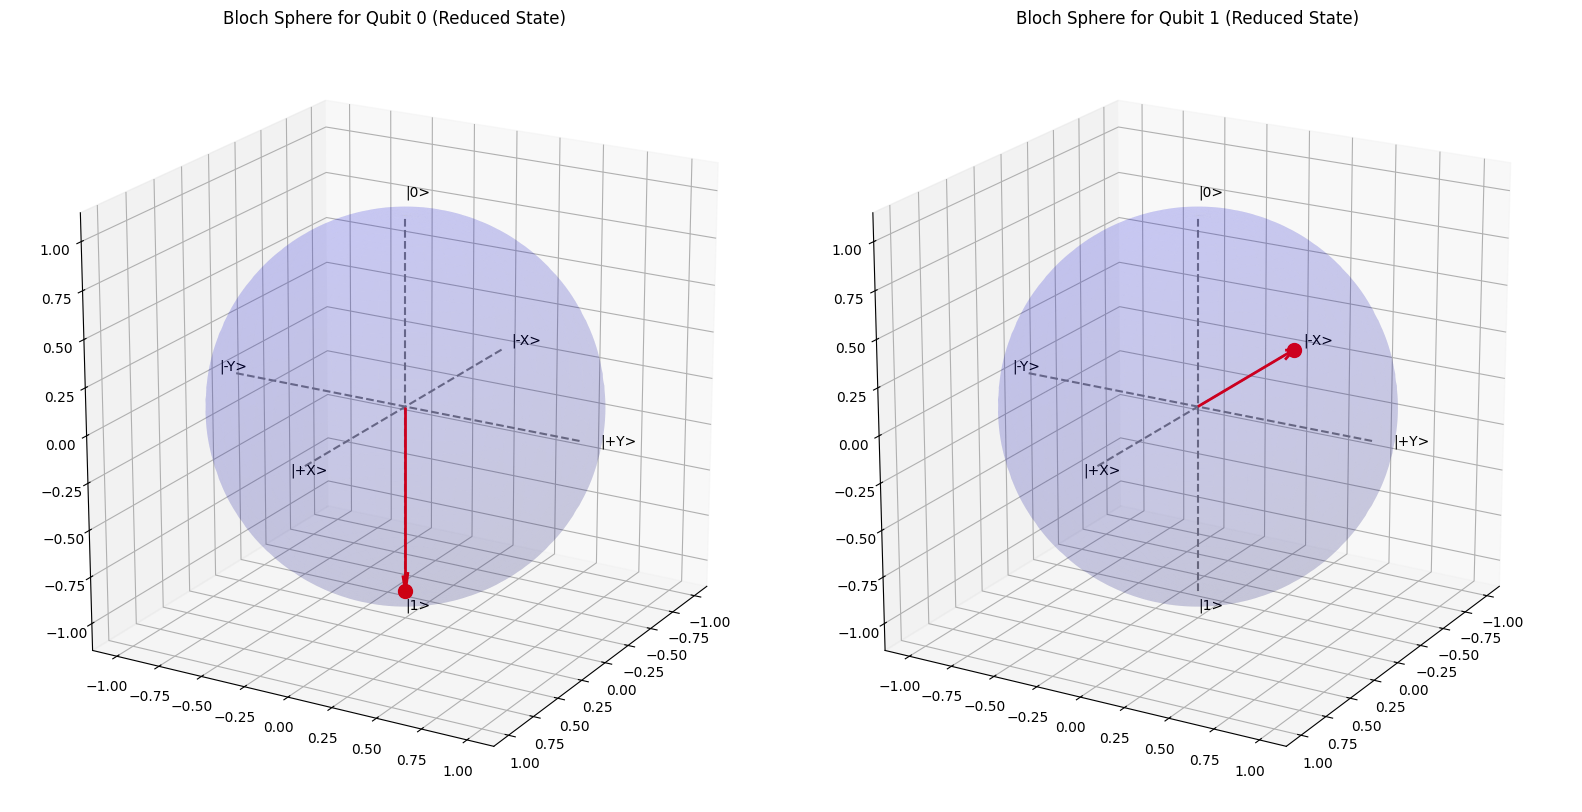

Bloch vector for q0: (0.000, 0.000, -1.000)
Bloch vector for q1: (-1.000, 0.000, 0.000)


In [64]:
import cirq
import qsimcirq
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_bloch_sphere(ax, x, y, z, title):
    """Plots a Bloch sphere with a given state vector."""
    # Draw the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    xs = np.outer(np.cos(u), np.sin(v))
    ys = np.outer(np.sin(u), np.sin(v))
    zs = np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(xs, ys, zs, color='b', alpha=0.1, linewidth=0)

    # Plot the axes
    ax.plot([-1, 1], [0, 0], [0, 0], color='gray', linestyle='--') # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], color='gray', linestyle='--') # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], color='gray', linestyle='--') # Z-axis

    # Labels for axes
    ax.text(1.1, 0, 0, '|+X>', color='black')
    ax.text(-1.1, 0, 0, '|-X>', color='black')
    ax.text(0, 1.1, 0, '|+Y>', color='black')
    ax.text(0, -1.1, 0, '|-Y>', color='black')
    ax.text(0, 0, 1.1, '|0>', color='black')
    ax.text(0, 0, -1.1, '|1>', color='black')

    # Plot the qubit state vector
    ax.quiver(0, 0, 0, x, y, z, color='r', linewidth=2, arrow_length_ratio=0.1, label='Qubit State')
    ax.scatter(x, y, z, color='r', s=100) # Plot the point on the sphere

    ax.set_title(title)
    ax.set_box_aspect([1,1,1]) # Equal aspect ratio
    ax.view_init(elev=20, azim=30) # Set viewing angle

def run_deutsch_josza_balanced_function():
    # Create two qubits
    q0 = cirq.GridQubit(0, 0)
    q1 = cirq.GridQubit(0, 1)

    # Create the circuit (Balanced Function)
    circuit_dj = cirq.Circuit(
        cirq.H(q0),
        cirq.X(q1),
        cirq.H(q1),
        cirq.CNOT(q0, q1), # Oracle for f(x)=x (balanced)
        cirq.H(q0),
        cirq.measure(q0, key='result'),
    )

    # Create the circuit (without measurement) for state vector visualization
    circuit_dj_a = cirq.Circuit(
        cirq.H(q0),
        cirq.X(q1),
        cirq.H(q1),
        cirq.CNOT(q0, q1),
        cirq.H(q0),
    )

    print("Circuit for Balanced Function: ")
    print(circuit_dj)

    # Create simulator
    simulator = qsimcirq.QSimSimulator()
    result = simulator.run(circuit_dj, repetitions=1000)

    print("Simulation results: ")
    print(result.histogram(key='result'))

    # Get the state vector before measurement for Bloch sphere visualization
    print("\nVector status (before measurement):")
    initial_state = simulator.simulate(circuit_dj_a).final_state_vector
    print(initial_state)

    # Vector after measurement
    print("\nVector status (after measurement):")
    after_m = simulator.simulate(circuit_dj).final_state_vector
    print(after_m)

    # Define system shape: (qubit 0, qubit 1) -> (dim 2, dim 2)
    QID_SHAPE = (2, 2)

    # Pauli matrices for Bloch vector calculation
    PAULI_X = np.array([[0, 1], [1, 0]], dtype=np.complex128)
    PAULI_Y = np.array([[0, -1j], [1j, 0]], dtype=np.complex128)
    PAULI_Z = np.array([[1, 0], [0, -1]], dtype=np.complex128)

    # Calculate reduced density matrix for q0 (index 0)
    rho_q0 = cirq.density_matrix_from_state_vector(
        initial_state, indices=[0], qid_shape=QID_SHAPE
    )

    # Calculate Bloch vector for q0
    x_q0 = np.real(np.trace(np.dot(rho_q0, PAULI_X)))
    y_q0 = np.real(np.trace(np.dot(rho_q0, PAULI_Y)))
    z_q0 = np.real(np.trace(np.dot(rho_q0, PAULI_Z)))

    # Calculate reduced density matrix for q1 (index 1)
    rho_q1 = cirq.density_matrix_from_state_vector(
        initial_state, indices=[1], qid_shape=QID_SHAPE
    )

    # Calculate Bloch vector for q1
    x_q1 = np.real(np.trace(np.dot(rho_q1, PAULI_X)))
    y_q1 = np.real(np.trace(np.dot(rho_q1, PAULI_Y)))
    z_q1 = np.real(np.trace(np.dot(rho_q1, PAULI_Z)))

    # Create a figure with two subplots
    fig = plt.figure(figsize=(16, 8))

    # Plot for Qubit 0
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    plot_bloch_sphere(ax0, x_q0, y_q0, z_q0, 'Bloch Sphere for Qubit 0 (Reduced State)')

    # Plot for Qubit 1
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    plot_bloch_sphere(ax1, x_q1, y_q1, z_q1, 'Bloch Sphere for Qubit 1 (Reduced State)')

    plt.tight_layout()
    plt.show()

    print(f"Bloch vector for q0: ({x_q0:.3f}, {y_q0:.3f}, {z_q0:.3f})")
    print(f"Bloch vector for q1: ({x_q1:.3f}, {y_q1:.3f}, {z_q1:.3f})")

if __name__ == '__main__':
    run_deutsch_josza_balanced_function()


## Quantum Fourier Transform (QFT)

Quantum Fourier Transform (QFT) circuit for 3 qubits:
                   ┌──────┐
(0, 0): ───H───@────@─────────────────×───
               │    │                 │
(0, 1): ───────@────┼────H────@───────┼───
                    │         │       │
(0, 2): ────────────@^0.5─────@───H───×───
                   └──────┘

This is the complete circuit for QFT only: 
                       ┌──────┐
(0, 0): ───X───H───@────@─────────────────×───
                   │    │                 │
(0, 1): ───────────@────┼────H────@───────┼───
                        │         │       │
(0, 2): ───X────────────@^0.5─────@───H───×───
                       └──────┘

State vector after QFT: 
[ 0.354+0.j     0.   -0.354j -0.354+0.j     0.   +0.354j -0.354+0.j
  0.   +0.354j  0.354+0.j     0.   -0.354j]

This is the complete circuit with QFT and iQFT: 
                       ┌──────┐                           ┌───────┐
(0, 0): ───X───H───@────@─────────────────×───×────────────@──────────@───H───
        

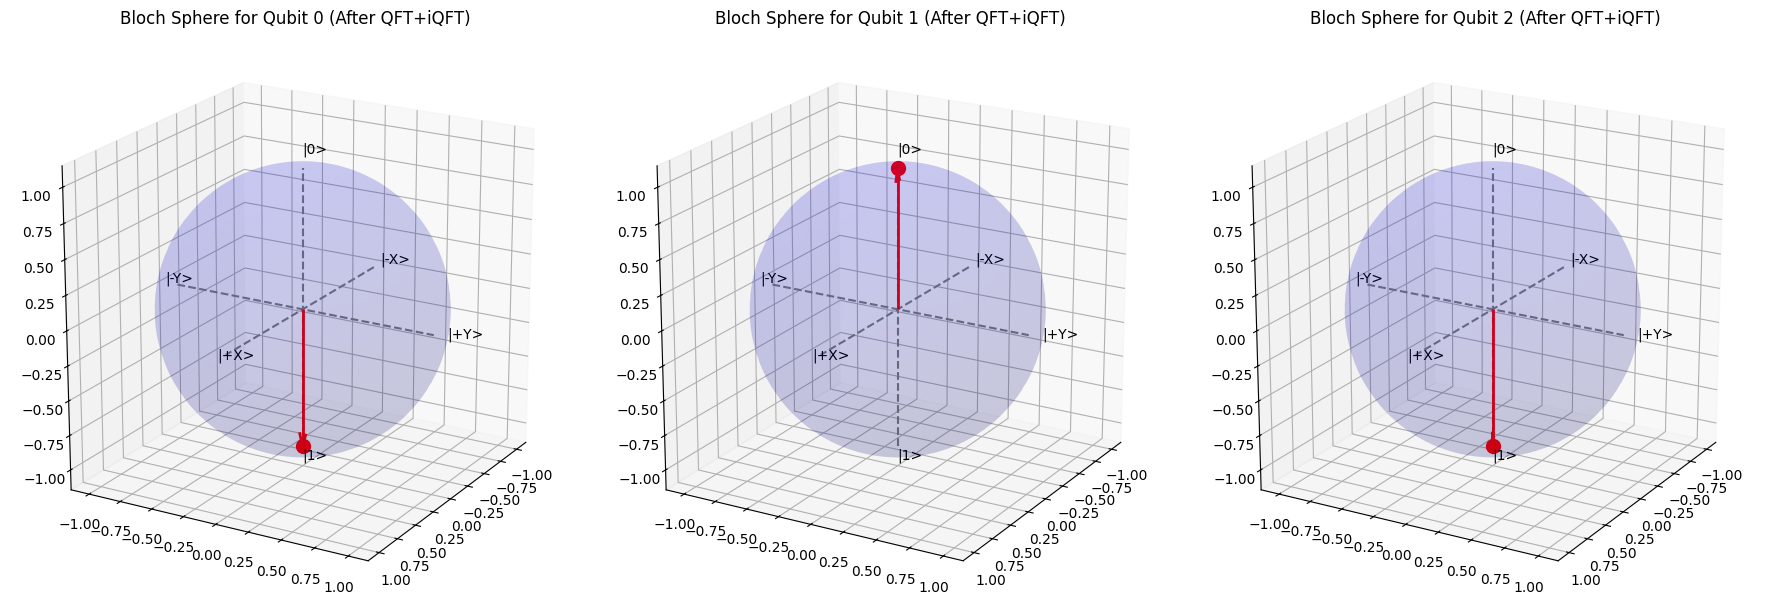

Bloch vector for q0: (-0.000, -0.000, -1.000)
Bloch vector for q1: (-0.000, 0.000, 1.000)
Bloch vector for q2: (0.000, 0.000, -1.000)


In [62]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import qsimcirq

def qft_circuit(qubits):
  q_list = list(qubits)
  circuit = cirq.Circuit()
  # Step 1: Apply H gates and controlled rotations
  for i, qubit in enumerate(q_list):
    # Apply H to the i-th qubit
    circuit.append(cirq.H(qubit))

    # Apply controlled rotation to the next qubit
    for j in range(i + 1, len(q_list)):
      # Rotation angle depends on the distance between the control and target qubits
      angle = 2.0 * np.pi / (2**(j - i + 1))
      # Implement controlled rotation gate
      circuit.append(cirq.CZ(q_list[j], qubit)**(2 * angle / np.pi))

  # Perform SWAP to reverse the order of qubits
  for i in range(len(q_list) // 2):
    circuit.append(cirq.SWAP(q_list[i], q_list[len(q_list) - 1 - i]))

  return circuit

def plot_bloch_sphere(ax, x, y, z, title):
    """Plots a Bloch sphere with a given state vector."""
    # Draw the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    xs = np.outer(np.cos(u), np.sin(v))
    ys = np.outer(np.sin(u), np.sin(v))
    zs = np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(xs, ys, zs, color='b', alpha=0.1, linewidth=0)

    # Plot the axes
    ax.plot([-1, 1], [0, 0], [0, 0], color='gray', linestyle='--') # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], color='gray', linestyle='--') # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], color='gray', linestyle='--') # Z-axis

    # Labels for axes
    ax.text(1.1, 0, 0, '|+X>', color='black')
    ax.text(-1.1, 0, 0, '|-X>', color='black')
    ax.text(0, 1.1, 0, '|+Y>', color='black')
    ax.text(0, -1.1, 0, '|-Y>', color='black')
    ax.text(0, 0, 1.1, '|0>', color='black')
    ax.text(0, 0, -1.1, '|1>', color='black')

    # Plot the qubit state vector
    ax.quiver(0, 0, 0, x, y, z, color='r', linewidth=2, arrow_length_ratio=0.1, label='Qubit State')
    ax.scatter(x, y, z, color='r', s=100) # Plot the point on the sphere

    ax.set_title(title)
    ax.set_box_aspect([1,1,1]) # Equal aspect ratio
    ax.view_init(elev=20, azim=30) # Set viewing angle

def run_quantum_fourier_transform():
    # Define 3 qubits
    q0, q1, q2 = cirq.GridQubit.rect(1, 3)

    # Create a Quantum Fourier Transform (QFT) circuit function
    my_qft = qft_circuit([q0, q1, q2])
    print("Quantum Fourier Transform (QFT) circuit for 3 qubits:")
    print(my_qft)

    # Input Circuit
    input_circuit = cirq.Circuit(
        cirq.X(q0),
        cirq.X(q2))

    full_circuit_qft_only = input_circuit + my_qft
    print("\nThis is the complete circuit for QFT only: ")
    print(full_circuit_qft_only)

    simulator = cirq.Simulator()
    result_qft_only = simulator.simulate(full_circuit_qft_only)
    print("\nState vector after QFT: ")
    print(np.round(result_qft_only.final_state_vector, 3))

    # Inverse QFT
    iqft_circuit = cirq.inverse(my_qft)

    full_circuit_qft_iqft = input_circuit + my_qft + iqft_circuit
    print("\nThis is the complete circuit with QFT and iQFT: ")
    print(full_circuit_qft_iqft)

    simulator = qsimcirq.QSimSimulator()
    result_qft_iqft = simulator.simulate(full_circuit_qft_iqft)
    print("\nState vector after QFT and iQFT: ")
    print(np.round(result_qft_iqft.final_state_vector, 3))

    # The 'result.final_state_vector' from the previous cell is the state we want to visualize
    final_qft_state_vector = result_qft_iqft.final_state_vector

    # Define system shape: (qubit 0, qubit 1, qubit 2) -> (dim 2, dim 2, dim 2)
    QID_SHAPE_3_QUBITS = (2, 2, 2)

    # Pauli matrices for Bloch vector calculation
    PAULI_X = np.array([[0, 1], [1, 0]], dtype=np.complex128)
    PAULI_Y = np.array([[0, -1j], [1j, 0]], dtype=np.complex128)
    PAULI_Z = np.array([[1, 0], [0, -1]], dtype=np.complex128)

    # --- Calculate Bloch vectors for each qubit ---

    # Qubit 0
    rho_q0_qft = cirq.density_matrix_from_state_vector(
        final_qft_state_vector, indices=[0], qid_shape=QID_SHAPE_3_QUBITS
    )
    x_q0_qft = np.real(np.trace(np.dot(rho_q0_qft, PAULI_X)))
    y_q0_qft = np.real(np.trace(np.dot(rho_q0_qft, PAULI_Y)))
    z_q0_qft = np.real(np.trace(np.dot(rho_q0_qft, PAULI_Z)))

    # Qubit 1
    rho_q1_qft = cirq.density_matrix_from_state_vector(
        final_qft_state_vector, indices=[1], qid_shape=QID_SHAPE_3_QUBITS
    )
    x_q1_qft = np.real(np.trace(np.dot(rho_q1_qft, PAULI_X)))
    y_q1_qft = np.real(np.trace(np.dot(rho_q1_qft, PAULI_Y)))
    z_q1_qft = np.real(np.trace(np.dot(rho_q1_qft, PAULI_Z)))

    # Qubit 2
    rho_q2_qft = cirq.density_matrix_from_state_vector(
        final_qft_state_vector, indices=[2], qid_shape=QID_SHAPE_3_QUBITS
    )
    x_q2_qft = np.real(np.trace(np.dot(rho_q2_qft, PAULI_X)))
    y_q2_qft = np.real(np.trace(np.dot(rho_q2_qft, PAULI_Y)))
    z_q2_qft = np.real(np.trace(np.dot(rho_q2_qft, PAULI_Z)))

    # --- Plotting Execution ---
    fig = plt.figure(figsize=(18, 6))

    ax0 = fig.add_subplot(1, 3, 1, projection='3d')
    plot_bloch_sphere(ax0, x_q0_qft, y_q0_qft, z_q0_qft, 'Bloch Sphere for Qubit 0 (After QFT+iQFT)')

    ax1 = fig.add_subplot(1, 3, 2, projection='3d')
    plot_bloch_sphere(ax1, x_q1_qft, y_q1_qft, z_q1_qft, 'Bloch Sphere for Qubit 1 (After QFT+iQFT)')

    ax2 = fig.add_subplot(1, 3, 3, projection='3d')
    plot_bloch_sphere(ax2, x_q2_qft, y_q2_qft, z_q2_qft, 'Bloch Sphere for Qubit 2 (After QFT+iQFT)')

    plt.tight_layout()
    plt.show()

    print(f"Bloch vector for q0: ({x_q0_qft:.3f}, {y_q0_qft:.3f}, {z_q0_qft:.3f})")
    print(f"Bloch vector for q1: ({x_q1_qft:.3f}, {y_q1_qft:.3f}, {z_q1_qft:.3f})")
    print(f"Bloch vector for q2: ({x_q2_qft:.3f}, {y_q2_qft:.3f}, {z_q2_qft:.3f})")

if __name__ == '__main__':
    run_quantum_fourier_transform()


## Instructions to Run the Python Files

To run the created Python files, follow these steps in your terminal or command prompt:

1.  **Install Dependencies** (if you haven't already):

    ```bash
    pip install -r requirements.txt
    ```

2.  **Run Individual Simulations**:

    *   **Superposition Simulation**:

        ```bash
        python superposition_simulation.py
        ```

    *   **Bell State Circuit Simulation**:

        ```bash
        python bell_state_circuit.py
        ```

    *   **Deutsch-Jozsa (Balanced Function) Simulation**:

        ```bash
        python deutsch_josza_balanced_function.py
        ```

    *   **Deutsch-Jozsa (Constant Function) Simulation**:

        ```bash
        python deutsch_josza_constant_function.py
        ```

    *   **Quantum Fourier Transform Simulation**:

        ```bash
        python quantum_fourier_transform.py
        ```

Each script will execute the quantum circuit, print simulation results, and display relevant plots (e.g., measurement histograms, Bloch spheres).
